
## GENERAL ANALYSIS

In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib as plt

In [2]:
with open('products.json', encoding='utf-8') as f:
    prod = json.load(f)
type(prod)


list

In [3]:
print(type(prod[2]))
print(prod[2])
#print(prod[2]['name'])

<class 'dict'>
{'sku': 127687, 'name': 'Duracell - AA Batteries (8-Pack)', 'type': 'HardGood', 'price': 7.49, 'upc': '041333825014', 'category': [{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'}, {'id': 'pcmcat248700050021', 'name': 'Housewares'}, {'id': 'pcmcat303600050001', 'name': 'Household Batteries'}, {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}], 'shipping': 5.49, 'description': 'Compatible with select electronic devices; AA size; DURALOCK Power Preserve technology; 8-pack', 'manufacturer': 'Duracell', 'model': 'MN1500B8Z', 'url': 'http://www.bestbuy.com/site/duracell-aa-batteries-8-pack/127687.p?id=1051384045676&skuId=127687&cmp=RMXCC', 'image': 'http://img.bbystatic.com/BestBuy_US/images/products/1276/127687_sa.jpg'}


In [4]:
data_list = []

for dic in prod:
    row={}   
    row['prod_id'] = dic['sku']
    row['name'] = dic['name']
    row['description'] = dic['description']
    
    for i in range(len(dic['category'])):
        row['cat_' + str(i)] = dic['category'][i]['id']
    data_list.append(row)

products_df = pd.DataFrame(data_list)

max_cat = products_df.isnull().sum(axis=1).to_frame()
max_cat.columns = ['max_cat']
max_cat['max_cat'] = 7 - max_cat['max_cat']
products_df = pd.concat([products_df, max_cat], axis=1)

products_df.tail()


,prod_id,name,description,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,max_cat
51641,9995663,Honeywell - True HEPA Replacement Filters for ...,Compatible with select Honeywell air purifier ...,abcat0900000,abcat0916000,pcmcat303700050016,NaN,NaN,NaN,NaN,3
51642,9996238,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,Removes dirt and grime from hard floors; cloth...,abcat0900000,abcat0916000,abcat0916008,abcat0916009,NaN,NaN,NaN,4
51643,9996826,Aleratec - Drive Enclosure - Internal - Black,"1 x Total Bay - 1 x 2.5"" Bay",abcat0500000,abcat0515000,abcat0504001,pcmcat186100050005,NaN,NaN,NaN,4
51644,9999119,Amazon - Fire TV Stick,"Streams 1080p content; dual-band, dual-antenna...",abcat0100000,pcmcat161100050040,pcmcat748301694435,NaN,NaN,NaN,NaN,3
51645,9999678,Proctor Silex - 4-Slice Toaster Oven - White,"PROCTOR SILEX 4-Slice Toaster Oven: Bake, broi...",abcat0900000,abcat0912000,abcat0912023,NaN,NaN,NaN,NaN,3


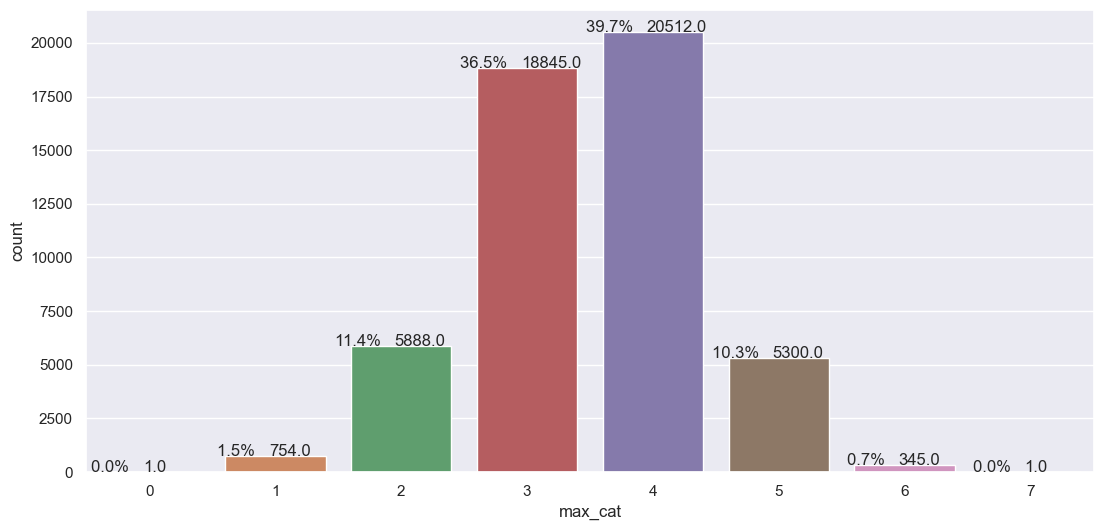

In [5]:
def tags(plot):
    total = float(len(products_df))
    
    for p in ax.patches:
        percentage = '{:.1f}%   '.format(100 * p.get_height()/total)
        count =  format(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha= 'right')
        disp =  ax.annotate(count, (x, y), ha= 'left')
    
    
### Complete in this cell: show distribution of target variable
sns.set(rc={"figure.figsize":(13, 6)})
ax = sns.countplot(data = products_df, x="max_cat")
tags(ax)

In [6]:
print(products_df.isnull().sum())

prod_id            0
name               1
description        0
cat_0              0
cat_1            755
cat_2           6643
cat_3          25488
cat_4          46000
cat_5          51300
cat_6          51645
max_cat            0
dtype: int64


In [7]:
# Selecting last category
for row in range(len(products_df)):
    
    column = products_df['max_cat'][row] + 2
    products_df.at[row ,'last_cat'] = products_df.iloc[row,column]
    
products_df

,prod_id,name,description,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,max_cat,last_cat
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,pcmcat312300050015,pcmcat248700050021,pcmcat303600050001,abcat0208002,NaN,NaN,NaN,4,abcat0208002
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,pcmcat312300050015,pcmcat248700050021,pcmcat303600050001,abcat0208002,NaN,NaN,NaN,4,abcat0208002
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,pcmcat312300050015,pcmcat248700050021,pcmcat303600050001,abcat0208002,NaN,NaN,NaN,4,abcat0208002
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,pcmcat312300050015,pcmcat248700050021,pcmcat303600050001,abcat0208002,NaN,NaN,NaN,4,abcat0208002
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,pcmcat312300050015,pcmcat248700050021,pcmcat303600050001,abcat0208002,NaN,NaN,NaN,4,abcat0208002
...,...,...,...,...,...,...,...,...,...,...,...,...
51641,9995663,Honeywell - True HEPA Replacement Filters for ...,Compatible with select Honeywell air purifier ...,abcat0900000,abcat0916000,pcmcat303700050016,NaN,NaN,NaN,NaN,3,pcmcat303700050016
51642,9996238,Dyson - Hard Floor Wipes for Dyson Hard DC56 V...,Removes dirt and grime from hard floors; cloth...,abcat0900000,abcat0916000,abcat0916008,abcat0916009,NaN,NaN,NaN,4,abcat0916009
51643,9996826,Aleratec - Drive Enclosure - Internal - Black,"1 x Total Bay - 1 x 2.5"" Bay",abcat0500000,abcat0515000,abcat0504001,pcmcat186100050005,NaN,NaN,NaN,4,pcmcat186100050005
51644,9999119,Amazon - Fire TV Stick,"Streams 1080p content; dual-band, dual-antenna...",abcat0100000,pcmcat161100050040,pcmcat748301694435,NaN,NaN,NaN,NaN,3,pcmcat748301694435


In [8]:
products_df.nunique()

prod_id        51646
name           48557
description    38537
cat_0             62
cat_1            172
cat_2            627
cat_3            777
cat_4            202
cat_5             23
cat_6              1
max_cat            8
last_cat        1668
dtype: int64

In [9]:
a = products_df.last_cat.unique() 
a

array(['abcat0208002', 'pcmcat113100050015', 'abcat0208006', ...,
       'pcmcat209400050003', 'abcat0302017', 'pcmcat265900050009'],
      dtype=object)

## Plots

### Names analysis

In [10]:
import nltk

#constructing DF
df = products_df.name.to_frame()
df = df.rename(columns={'name': 'text'})
df['text'] = df['text'].astype(str)


In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]  

df['tokenized'] = df.apply(lambda x: tokenize(x['text']), axis=1)
#df[['tokenized']].head()  

words_list = []
for i in range(len(df)):    
    words_list.extend(df.tokenized[i])

print('Uniques words:', len(set(words_list)))
#making  dict with counts of words

dictionary = {}
for item in words_list:
    dictionary[item] = dictionary.get(item, 0) + 1



Uniques words: 14206


In [13]:
#print(dictionary)

df = pd.DataFrame([dictionary]).transpose()
df = df.rename(columns={0: 'Appearance'})


In [14]:
df.sort_values(by='Appearance', ascending=False).head(20)

,Appearance
Black,15148
for,10702
Case,4842
and,4560
White,4178
with,2591
Samsung,2527
Nintendo,2337
Cell,2061
Cu,1929


In [15]:
#df.sort_values(by='Appearence', ascending= False)
for index, row in df.iterrows():

    if row['Appearance'] > 1000: 
        df.at[index ,'bins'] = 'more than 1000'  
    elif row['Appearance'] > 50: 
        df.at[index ,'bins'] = 'btw 1000 and 50'          
    elif row['Appearance'] > 10: 
        df.at[index ,'bins'] = 'btw 50 and 10'                  
    elif row['Appearance'] > 5: 
        df.at[index ,'bins'] = 'btw 10 and 5'
    elif row['Appearance'] > 1: 
        df.at[index ,'bins'] = 'btw 5 and 2'     
    else:
        df.at[index ,'bins'] = '1 appearance'


In [16]:
df['bins'].value_counts().sort_values()

more than 1000       44
btw 1000 and 50     953
btw 10 and 5       1639
btw 50 and 10      2168
1 appearance       4697
btw 5 and 2        4705
Name: bins, dtype: int64

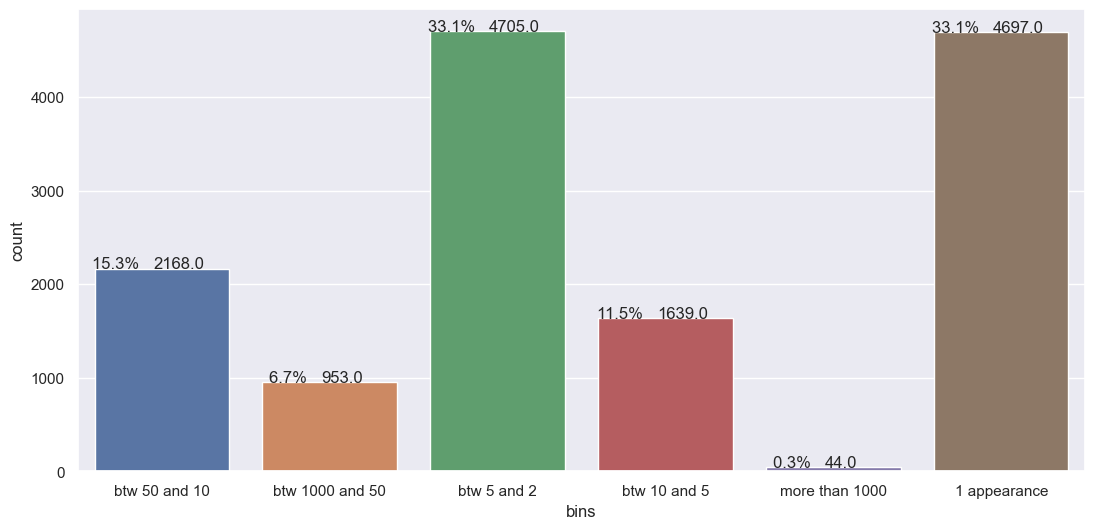

In [17]:
# making a function with a for loop to show the percentage and the counter for each column/pile
# ax.patches = number of piles (in this case 2)

def tags(plot):
    total = float(len(df))
    
    for p in ax.patches:
        percentage = '{:.1f}%   '.format(100 * p.get_height()/total)
        count =  format(p.get_height())
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), ha= 'right')
        disp =  ax.annotate(count, (x, y), ha= 'left')
    
### Complete in this cell: show distribution of target variable
sns.set(rc={"figure.figsize":(13, 6)})
ax = sns.countplot(data = df, x="bins")
tags(ax)


In [18]:
df.sort_values(by='Appearance', ascending=False).iloc[10:20]

,Appearance,bins
Series,1874,more than 1000
Select,1821,more than 1000
Silver,1795,more than 1000
Galaxy,1778,more than 1000
Memory,1745,more than 1000
Phones,1707,more than 1000
Wireless,1680,more than 1000
Drive,1626,more than 1000
Blue,1615,more than 1000
Hard,1582,more than 1000


## Descriptions analysis

In [19]:
#constructing DF
df_desc = products_df.description.to_frame()
df_desc
df_desc = df_desc.rename(columns={'description': 'text'})
df_desc['text'] = df_desc['text'].astype(str)

In [20]:
def tokenize(column):
    """Tokenizes a Pandas dataframe column and returns a list of tokens.

    Args:
        column: Pandas dataframe column (i.e. df['text']).

    Returns:
        tokens (list): Tokenized list, i.e. [Donald, Trump, tweets]
    """

    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]  

df_desc['tokenized'] = df_desc.apply(lambda x: tokenize(x['text']), axis=1)
#df[['tokenized']].head()  

words_list = []
for i in range(len(df_desc)):    
    words_list.extend(df_desc.tokenized[i])

print('Uniques words:', len(set(words_list)))
#making  dict with counts of words

dictionary = {}
for item in words_list:
    dictionary[item] = dictionary.get(item, 0) + 1

Uniques words: 23776


In [21]:
#print(dictionary)

df_desc = pd.DataFrame([dictionary]).transpose()
df_desc = df_desc.rename(columns={0: 'Appearance'})
df_desc

,Appearance
Compatible,13463
with,24806
select,3145
electronic,823
devices,2265
...,...
RUNTASTIC,3
Wristbands,1
Runtastic,4
Sunbeam,1


In [22]:
#df.sort_values(by='Appearence', ascending= False)
for index, row in df_desc.iterrows():

    if row['Appearance'] > 1000: 
        df_desc.at[index ,'bins'] = 'more than 1000'  
    elif row['Appearance'] > 50: 
        df_desc.at[index ,'bins'] = 'btw 1000 and 50'          
    elif row['Appearance'] > 10: 
        df_desc.at[index ,'bins'] = 'btw 50 and 10'                  
    elif row['Appearance'] > 5: 
        df_desc.at[index ,'bins'] = 'btw 10 and 5'
    elif row['Appearance'] > 1: 
        df_desc.at[index ,'bins'] = 'btw 5 and 2'     
    else:
        df_desc.at[index ,'bins'] = '1 appearance'

In [23]:

df_desc['bins'].value_counts().sort_values()

more than 1000       96
btw 1000 and 50    2031
btw 10 and 5       2780
btw 50 and 10      4000
1 appearance       6978
btw 5 and 2        7891
Name: bins, dtype: int64

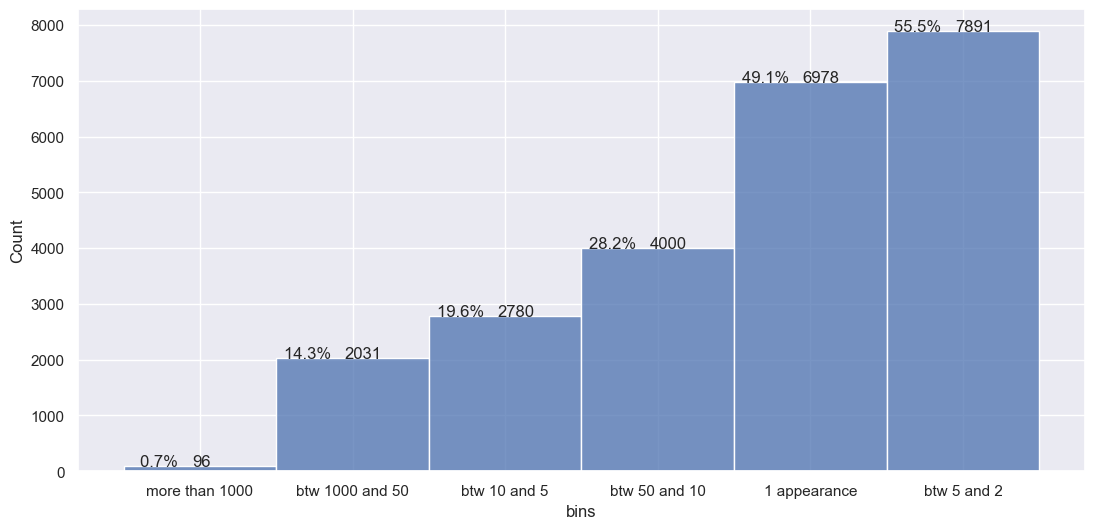

In [27]:
ax = sns.histplot(df_desc, x="bins")
# tratar de hacer countplot
#REuse the function to show the percentage and the counter
tags(ax)

In [25]:
df_desc.sort_values(by='Appearance', ascending=False).head(20)

,Appearance,bins
and,30193,more than 1000
with,24806,more than 1000
Compatible,13463,more than 1000
to,12396,more than 1000
for,8754,more than 1000
design,8055,more than 1000
up,7139,more than 1000
of,7035,more than 1000
Apple,6212,more than 1000
most,6130,more than 1000


In [26]:
df_desc.sort_values(by='Appearance', ascending=False).head(20)

,Appearance,bins
and,30193,more than 1000
with,24806,more than 1000
Compatible,13463,more than 1000
to,12396,more than 1000
for,8754,more than 1000
design,8055,more than 1000
up,7139,more than 1000
of,7035,more than 1000
Apple,6212,more than 1000
most,6130,more than 1000
